The function is:

$(2-x)^2 + 80(y-x^2)^2$

it is clear that the minimizer is

$(x_m,y_m) = (2,4) $

And the minimum value of the function at this value is

$f(2,4) = 0$

For the given function (2,4) is the global minima

To determine whether the function is convex, the determinant of its hessian must be always positive

From my calculations, the function is most likely convex

The table for
tolerace      x_min     y_min     count       f_opt
[0.         1.59046012 2.52956333 3.         0.16772291]
[1.00000000e+00 1.99999529e+00 3.99998115e+00 5.00000000e+00
 2.19815277e-11]
[2.00000000e+00 1.99999529e+00 3.99998115e+00 5.00000000e+00
 2.19815277e-11]
[3.00000000e+00 1.99999529e+00 3.99998115e+00 5.00000000e+00
 2.19815277e-11]
[4.00000000e+00 1.99999529e+00 3.99998115e+00 5.00000000e+00
 2.19815277e-11]
[5.00000000e+00 1.99999529e+00 3.99998115e+00 5.00000000e+00
 2.19815277e-11]
[6. 2. 4. 6. 0.]
[7. 2. 4. 6. 0.]
[8. 2. 4. 7. 0.]
[9. 2. 4. 7. 0.]
[10.  2.  4.  7.  0.]
[11.  2.  4.  7.  0.]
[12.  2.  4.  7.  0.]
[13.  2.  4.  7.  0.]
[14.  2.  4.  7.  0.]
[15.  2.  4.  7.  0.]
[16.  2.  4.  7.  0.]
[17.  2.  4.  7.  0.]
[18.  2.  4.  7.  0.]
[19.  2.  4.  7.  0.]
[20.  2.  4.  7.  0.]


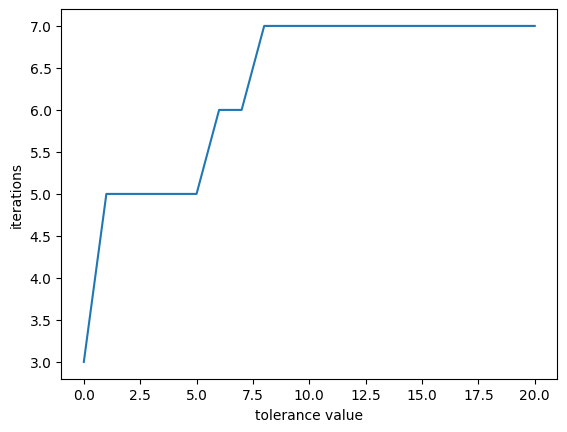


Minimum value =  0.0
Minimiser in x =  2.0
Minimiser in y =  4.0


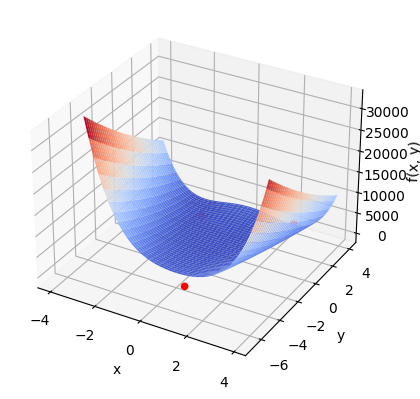

In [8]:
# Exercise 4 part 3

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    # Roll no = 22b2467
    # b = 80 a = 1
    return 80*x**4 - 160*y*(x**2) + x**2 + 80*y**2 - 4*x + 4

# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 320*x**3 - 320*x*y + 2*x - 4

def df_dy(x, y):
    return 160*y - 160*x**2

def d2f_dydx(x,y):
    return -320*x

def d2f_dxdy(x,y):
    return -320*x

def d2f_dx2(x,y):
    return 960*x**2 - 320*y + 2

def d2f_dy2(x,y):
    return 160

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(start_x, start_y):

    tablelist=[]

    # An array X and Y to store and display the tolerance vs iterations graph
    X=[]
    Y=[]

    for i in range(21):

    # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

    # Perform the newton optimisation iterations

        while (norm > TLevel):
        # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            hess_x2 = d2f_dx2(x,y)
            hess_y2 = d2f_dy2(x,y)

            hess_yx = d2f_dydx(x,y)
            hess_xy = d2f_dxdy(x,y)

            grad = [[grad_x], [grad_y]]
            hess = [[hess_x2, hess_yx],[hess_xy, hess_y2]]

            hess_inv = np.linalg.inv(hess)

            # Update the parameters
            x = x - (hess_inv[0][0]*grad[0][0] + hess_inv[0][1]*grad[1][0])
            y = y - (hess_inv[1][0]*grad[0][0] + hess_inv[1][1]*grad[1][0])

            # Update Norm of gradient
            norm = L2Norm(x,y)

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

            #count the iterations for convergence
            count = count+1


        #To tabulate
        tablelist.append((i, x, y, count, f(x,y)))

        table_array = np.array(tablelist)

        X.append(i)
        Y.append(count)

    # Printing the table
    print("The table for")
    print("tolerace      x_min     y_min     count       f_opt")

    for i in range(21):
        print(table_array[i])

    #plotting iterations vs tolerance
    plt.plot(X,Y)
    plt.xlabel('tolerance value')
    plt.ylabel('iterations')
    plt.show()


    return x, y, f(x, y), history



# Define the meshgrid for plotting the function
x_range = np.arange(-4, 4, 0.1)
y_range = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform newton optimisation and plot the results
start_x, start_y = -1.5, 1.5

#here we are taking the values of the highest tolerance level
x_opt, y_opt, f_opt, history = newton_opt(start_x, start_y)

print()
print("Minimum value = ", f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

In [ ]:
#Exercise 4 part 4

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to be minimized
def f(x, y):
    # Roll no = 22b2467
    # b = 80 a = 1
    return 80*x**4 - 160*y*(x**2) + x**2 + 80*y**2 - 4*x + 4


# Define the partial derivatives of the function with respect to x and y
def df_dx(x, y):
    return 320*x**3 - 320*x*y + 2*x - 4

def df_dy(x, y):
    return 160*y - 160*x**2

def L2Norm(x,y):
    grad_x = df_dx(x,y)
    grad_y = df_dy(x,y)
    return np.sqrt(grad_x ** 2 + grad_y ** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the gradient descent algorithm
def gradient_descent(start_x, start_y, learning_rate):

    # An array X and Y to store and display the tolerance vs iterations graph
    tablelist=[]

    for i in range (10):

        # Initialize the parameters
        x = start_x
        y = start_y
        history = []
        norm = L2Norm(x,y)
        TLevel = tolerance(i)
        count = 0

        # Perform the gradient descent iterations

        while (norm > TLevel):
            # Calculate the gradients
            grad_x = df_dx(x, y)
            grad_y = df_dy(x, y)

            # Update the parameters
            x = x - learning_rate * grad_x
            y = y - learning_rate * grad_y

            # Update Norm of gradient
            norm = L2Norm(x,y)

            #count the iterations for convergence
            count=count+1

            # Save the history of the parameters
            history.append((x, y, f(x, y)))

        #To tabulate, tolerance, iterations, minima
        tablelist.append((i, count, f(x,y)))

        table_array = np.array(tablelist)

    # Printing the table
    print("The table for")
    print("tolerance         iterations          minima")
    print(table_array)

    return x, y, f(x, y), history

# Define the meshgrid for plotting the function
x_range = np.arange(-2, 2, 0.1)
y_range = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

# Perform gradient descent and plot the results
start_x, start_y = -1.5, 1.5
learning_rate = 0.001
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate)

print()
print(f_opt)
print("Minimiser in x = ", x_opt)
print("Minimiser in y = ", y_opt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

Regarding Exercise 4 Part 4,

When using algorithm 2, Gradient Descent, on the function in exercise 4, namely

$(2-x)^2 + 80(y-x^2)^2$

The program doesn't complete, isntead the session crashes after using all avaialble ram.

It is clear that the Gradient Descent method may not be as efficient as Newton's Method for Optimisation when it comes to some functions.

From this, we can conclude that it may be the case that second order methods for optimisation, here Newton's method, are more efficient than first order methods like Gradient Descent



A possible shortcoming of the Newton Descent Algorithm is that, the time taken to converge to the minimum may depend on how close we are to the minima from our starting point.

If we could somehow enlarge the direction of our search region, or the radius of the area we are searching in, then this algorithm would improve.